# Solving 1-D Schrodinger Equation with quadratic potential
### Import required packages

In [1]:
from scipy import integrate
from scipy import sparse
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
#plt.rc('savefig', dpi=300)
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### set initial conditions

In [2]:
dx    = 0.02                       # spatial separation
x     = np.arange(0, 10, dx)       # spatial grid points
kx    = 0.1                        # wave number
m     = 1                          # mass
sigma = 0.1                        # width of initial gaussian wave-packet
x0    = 3.0                        # center of initial gaussian wave-packet
A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant
psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)  # Initial Wavefunction

### Potential V(x)

In [3]:
x_Vmin = 5         # center of V(x)
T      = 1           # peroid of SHO 

omega = 2 * np.pi / T
k = omega**2 * m
V = 0.5 * k * (x - x_Vmin)**2

### Make a plot of $\psi_{o}$ and V 

Total Probability:  0.9999999999999992


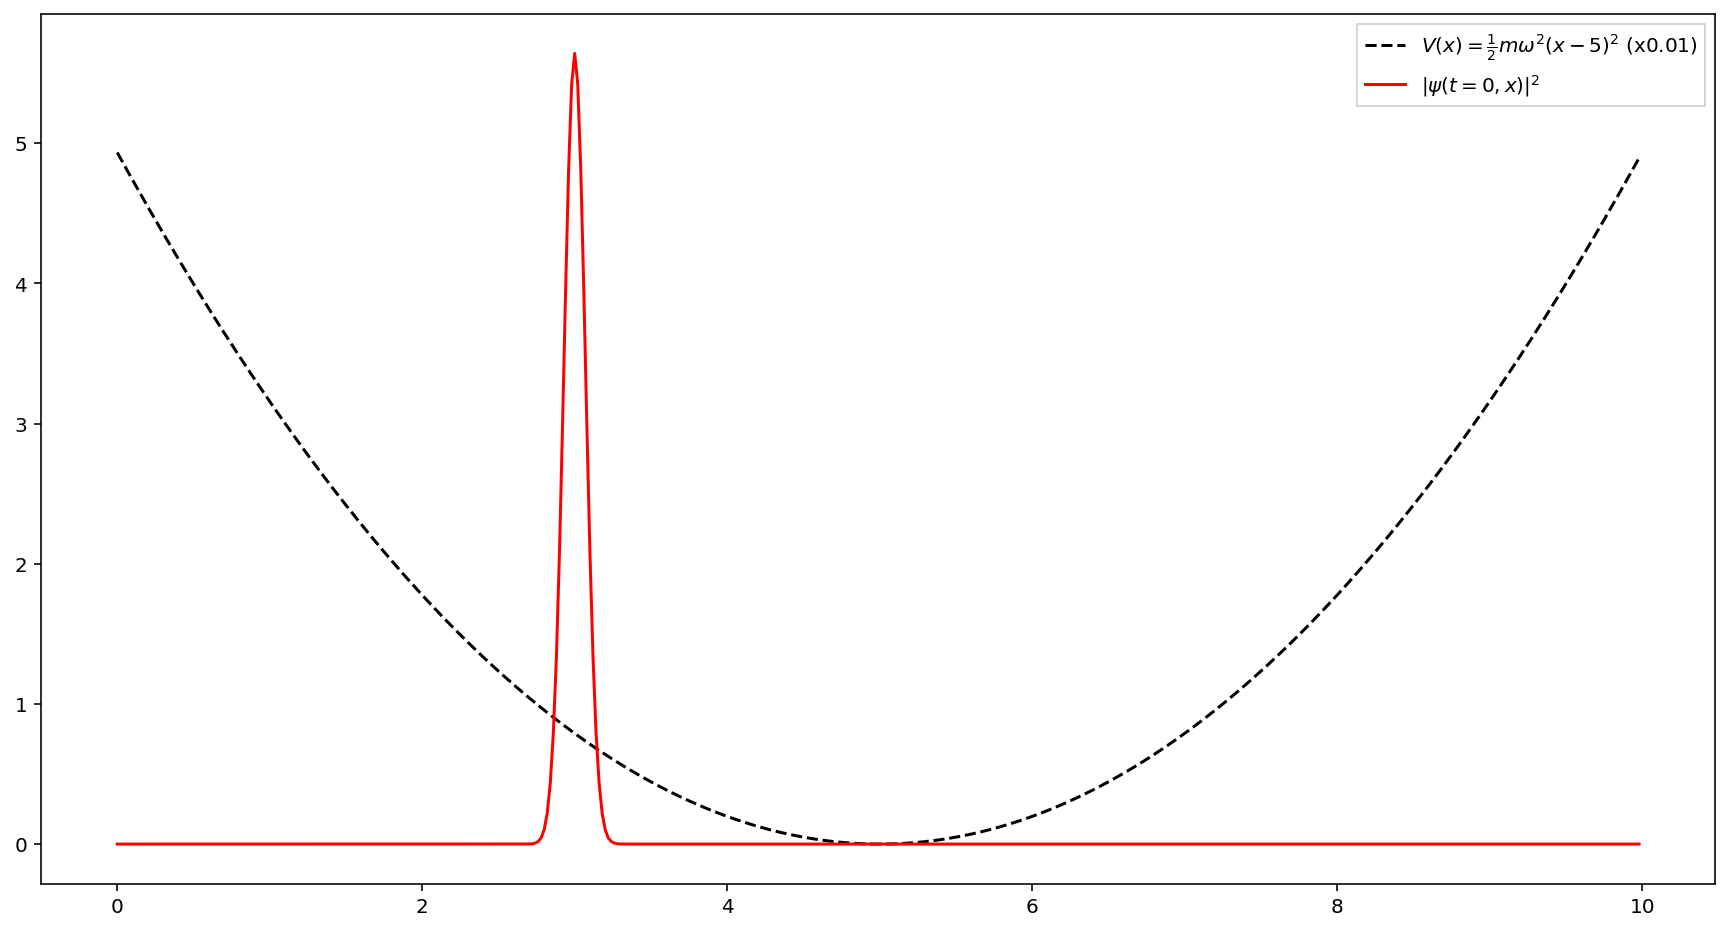

In [4]:
fig = plt.figure(figsize=(15,8))
plt.plot(x, V*0.01, "k--", label=r"$V(x) = \frac{1}{2}m\omega^2 (x-5)^2$ (x0.01)")
plt.plot(x, np.abs(psi0)**2, "r", label=r"$\vert\psi(t=0,x)\vert^2$")
plt.legend(loc=1, fontsize=10, fancybox=False)
print("Total Probability: ", np.sum(np.abs(psi0)**2)*dx)

### Laplace Operator (Finite Difference)Laplace Operator (Finite Difference)
The 1-D Laplace operator $\nabla^2=\frac{ \partial^2}{ \partial^2 x}$ can be expressed in terms of a banded matrix:


In [5]:
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

To test our $\bf{D_2}$ operator, we can apply it on a $\sin(x)$ function to see if it gives us  $[\sin''(x) = -\sin(x)]$

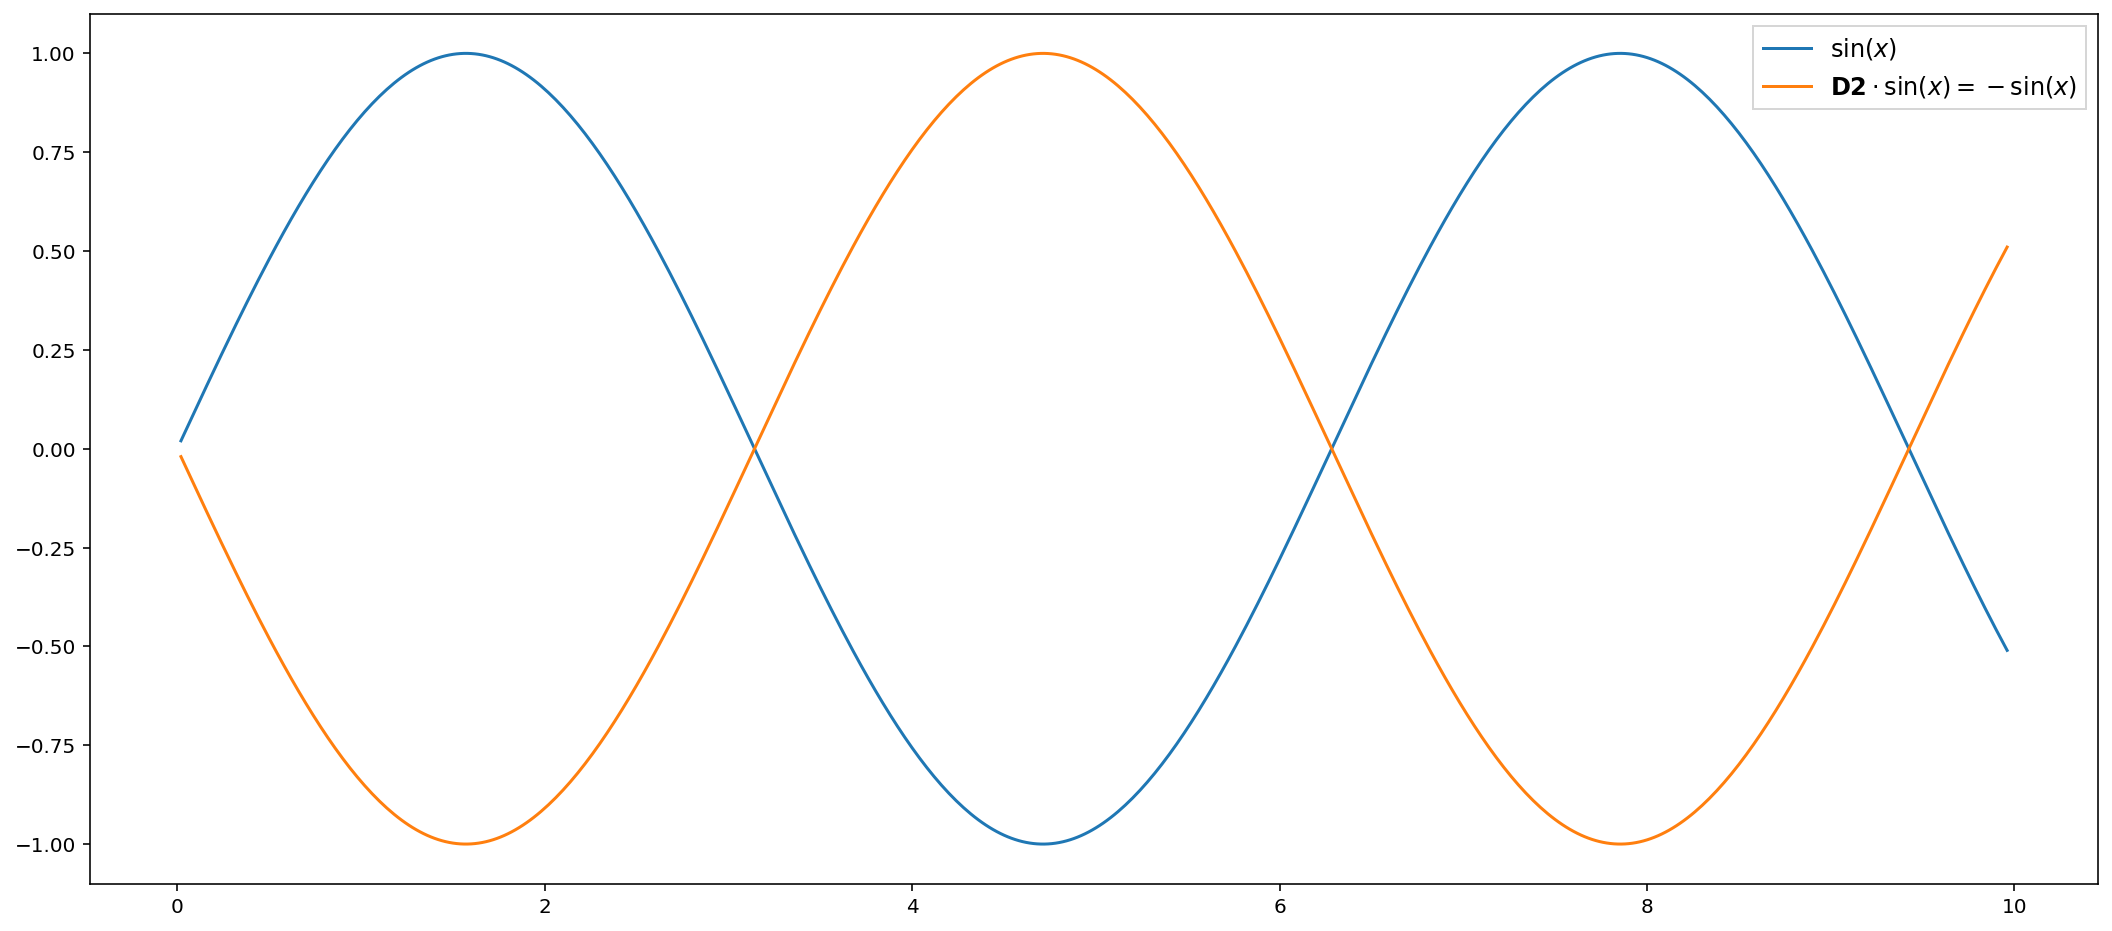

In [6]:
fig = plt.figure(figsize=(18,8))
plt.plot(x[1:-1], np.sin(x)[1:-1], label=r"$\sin(x)$")
plt.plot(x[1:-1], D2.dot(np.sin(x))[1:-1], label=r"$\mathbf{D2} \cdot \sin(x) = -\sin(x)$")
plt.legend(loc=1, fontsize=12, fancybox=False)

### Solve Schrodinger Equation
Original 1-D Schrodinger equation: $ \Large i\hbar\frac{\partial }{\partial t}\psi = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2} + V \psi $

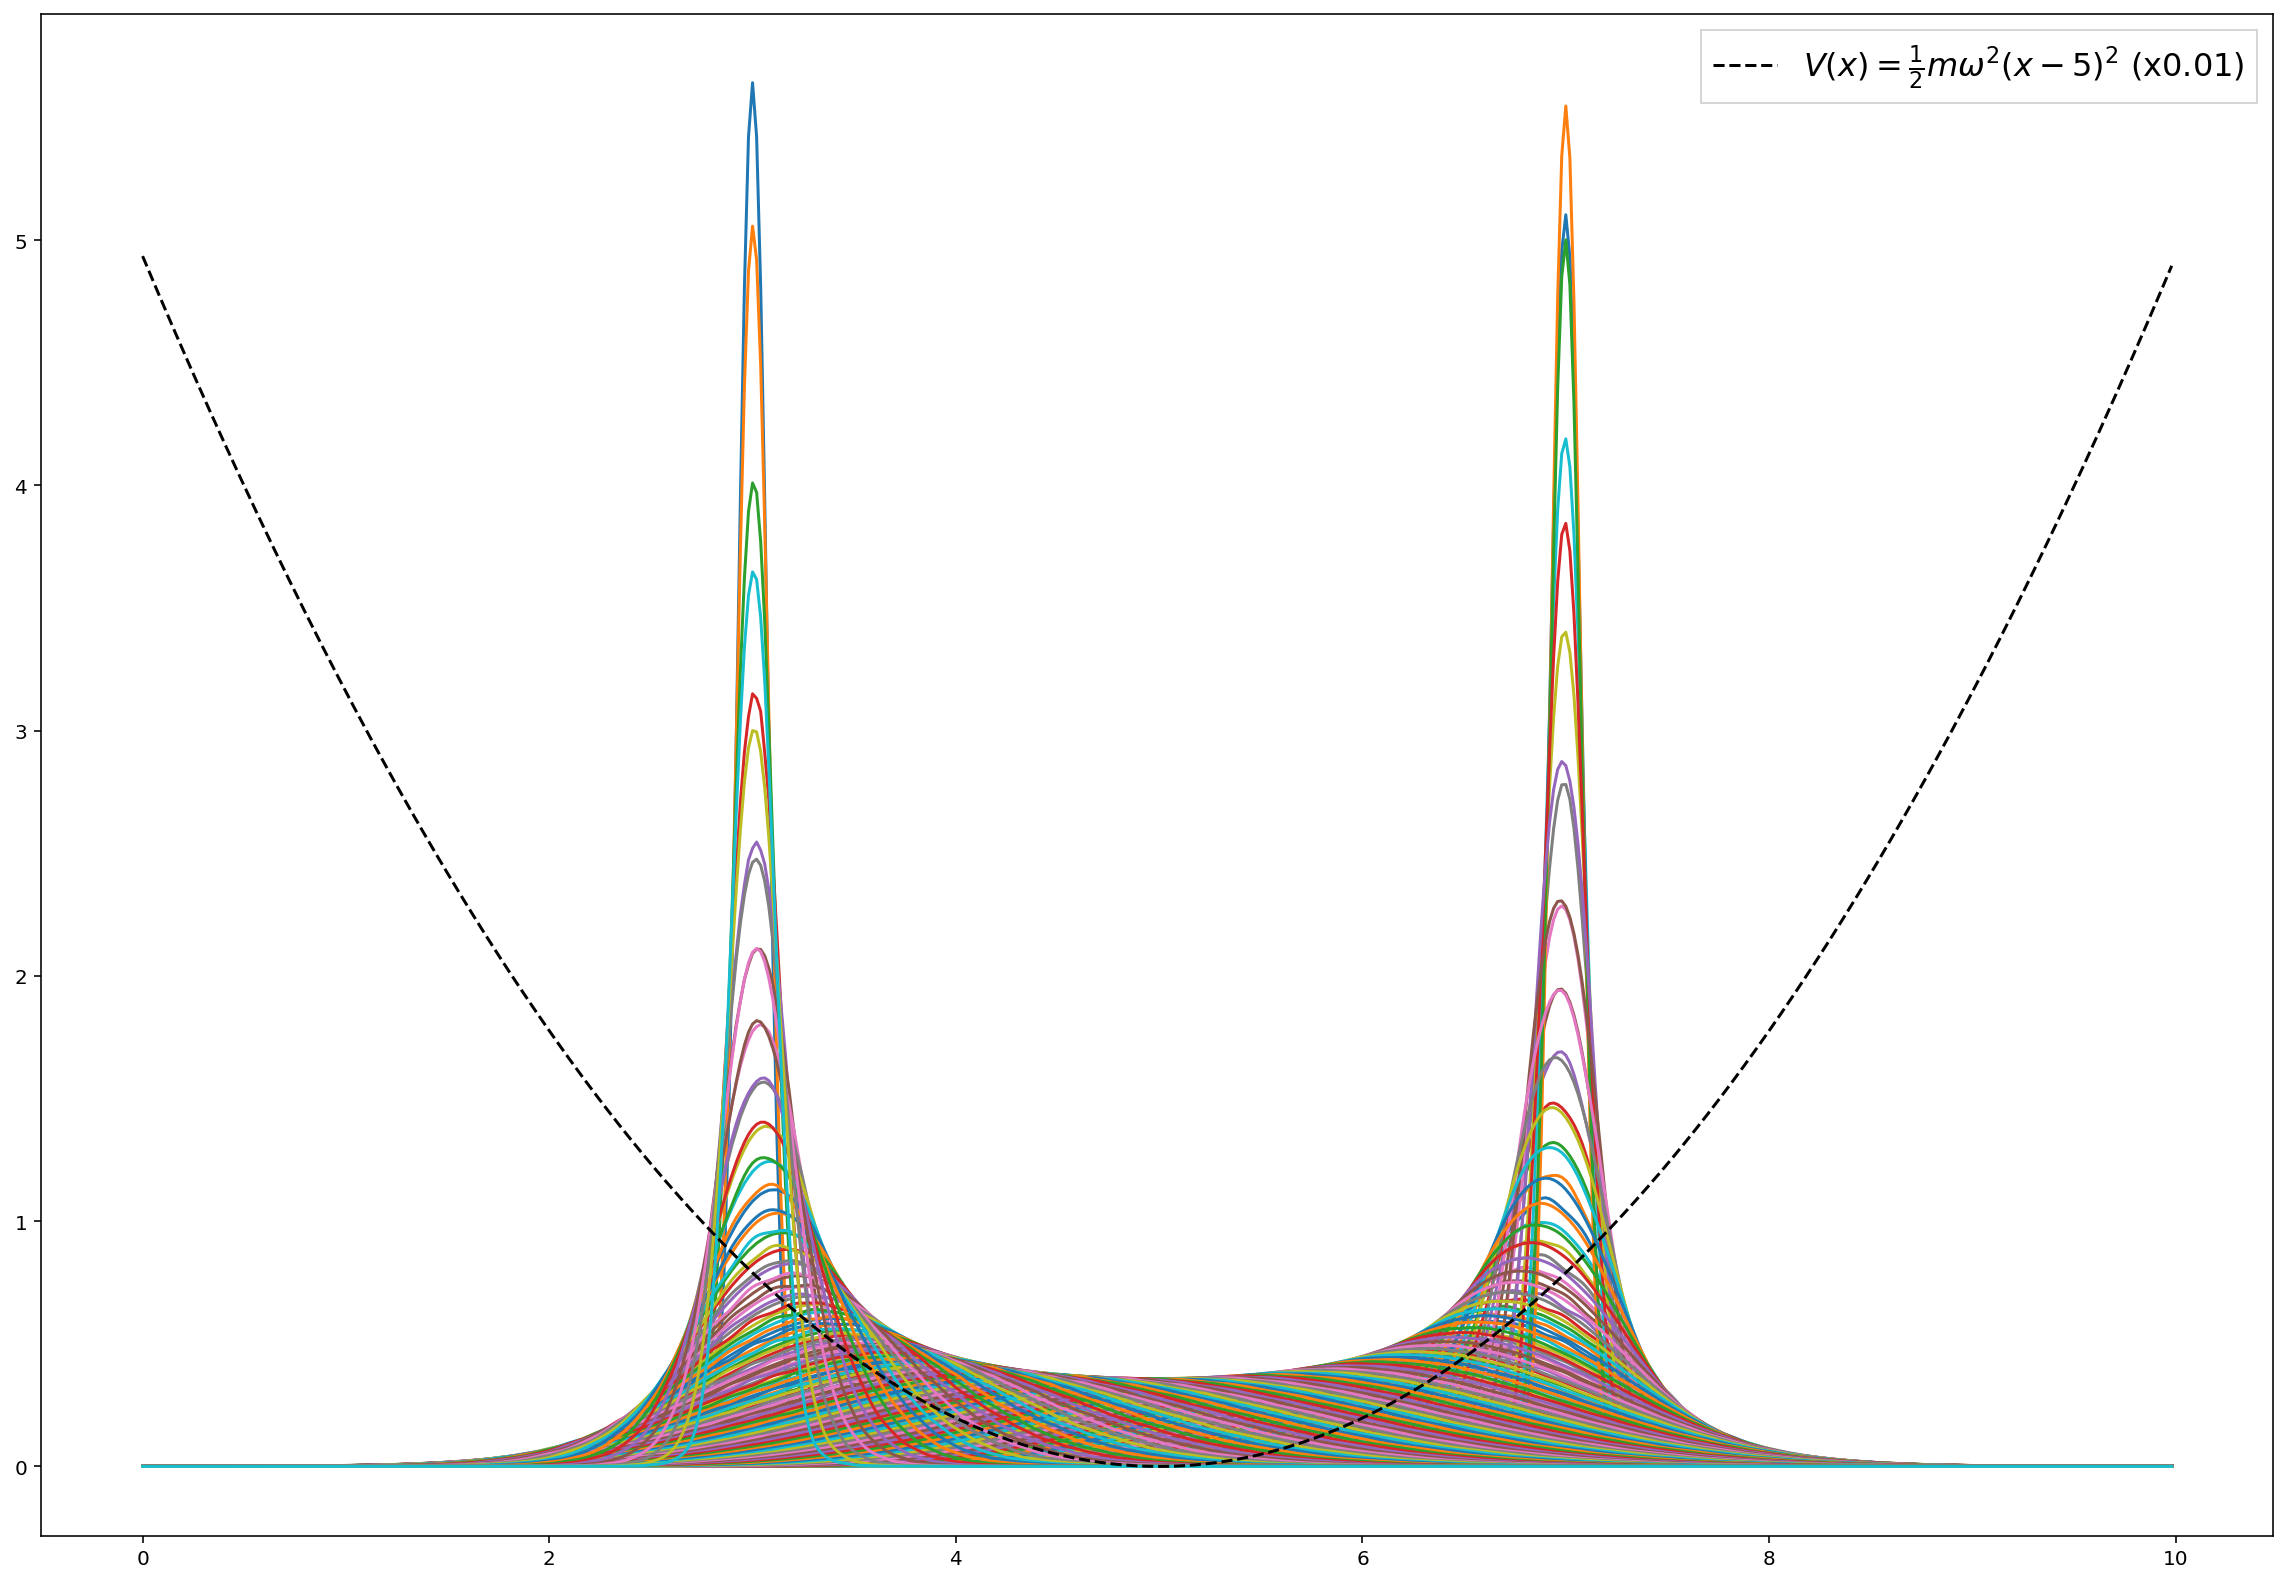

In [7]:
# RHS of Schrodinger Equation
hbar = 1                    # hbar = 1.0545718176461565e-34

def psi_t(t, psi):
    return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)


#parameters

dt = 0.005  # time interval for snapshots
t0 = 0.0    # initial time
tf = 1.0    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

# Solve the Initial Value Problem
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")

#plot
fig = plt.figure(figsize=(20, 14))
for i, t in enumerate(sol.t):
    plt.plot(x, np.abs(sol.y[:,i])**2)             # Plot Wavefunctions
#     print(np.sum(np.abs(sol.y[:,i])**2)*dx)        # Print Total Probability (Should = 1)
plt.plot(x, V * 0.01, "k--", label=r"$V(x) = \frac{1}{2}m\omega^2 (x-5)^2$ (x0.01)")   # Plot Potential
plt.legend(loc=1, fontsize=16, fancybox=False)
#fig.savefig('sho@2x.png')

### Plotting

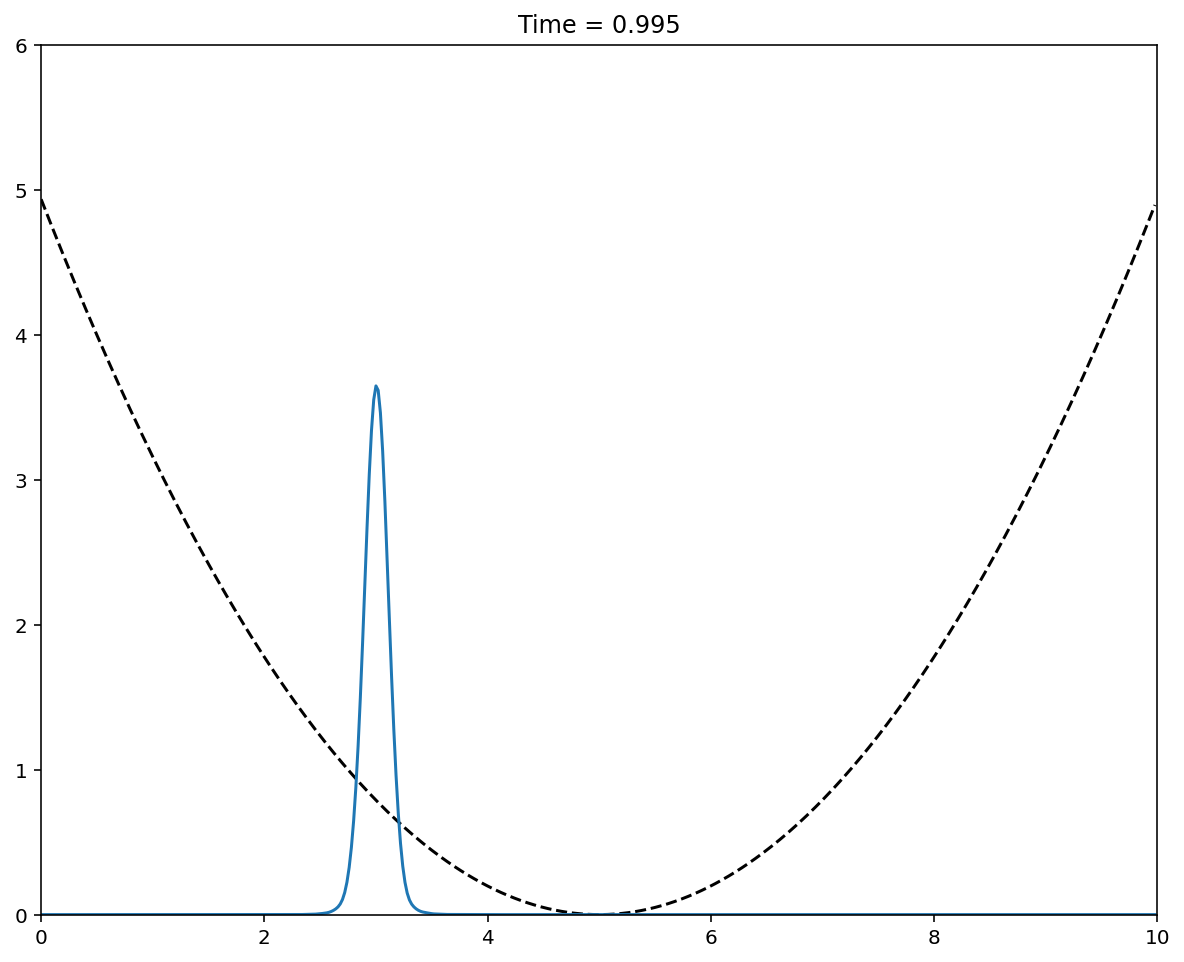

In [8]:
#amination
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])

def init():
    line1.set_data(x, V * 0.01)
    return line1,

def animate(i):
    line2.set_data(x, np.abs(sol.y[:,i])**2)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=50, blit=True)

# Save the animation into a short video
#anim.save('sho.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)

# Display the animation in the jupyter notebook
HTML(anim.to_jshtml())